# Анализ экспериментальных данных 2013 года

Используется файл Димы timur2013.txt от 22.09.2016 

В нем почему-то 482 события, хотя раньше было 457.

In [1]:
!date

Пнд Дек 12 16:25:36 MSK 2016


In [2]:
!pwd

/home/sphere/Analysis/500-----DrawExpLDF/Parameters


In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
from tqdm import tqdm
import math as mt
import numpy as np

In [4]:
datum = pd.read_csv('timur2013.csv', header = 0, index_col=2, sep=' ')
len(datum)

482

In [5]:
## --- старые данные Димы (август 2016) ---
datumold = pd.read_csv('Theta2013.csv', header = 0, index_col=2, sep=' ')
len(datumold)

457

In [6]:
datum[:3]

,Year,Fl,Ver,H,alpha,beta,Theta,Phi,Xo,Yo,Integral
Number,,,,,,,,,,,
10675,2013,1,12.0,312.7,1.6,-1.6,0.25623,5.35497,23.69,-135.26,6.520000e+09
10677,2013,1,12.0,312.7,1.7,-1.6,0.43936,2.88205,-236.56,33.14,2.440000e+10
10685,2013,1,12.0,313.0,2.1,-1.2,0.31515,-1.60465,67.90,-84.53,1.670000e+10


## Распределение по зенитному углу 

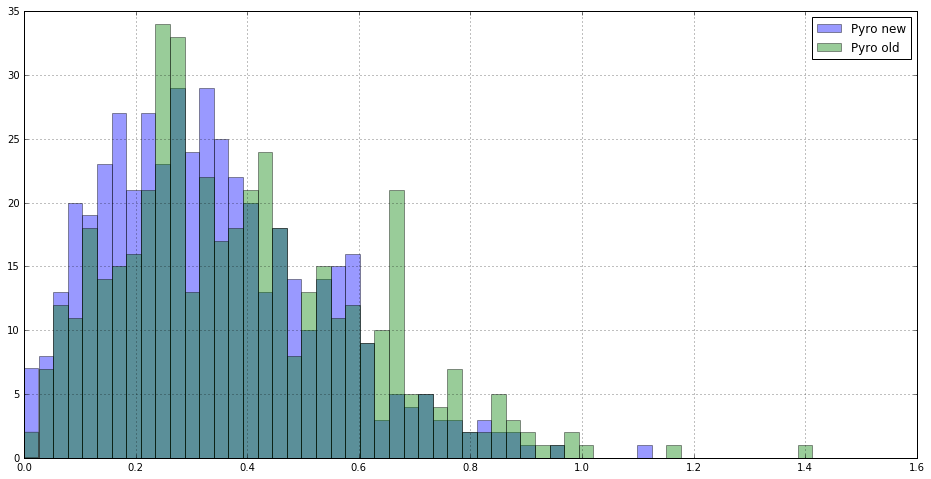

In [7]:
plt.figure(figsize=(16,8))
plt.hist(datum['Theta'],    range=[0, 1.57], bins=60, alpha=0.4, label=r"Pyro new")
plt.hist(datumold['Theta'], range=[0, 1.57], bins=60, alpha=0.4, label=r"Pyro old")
plt.legend(loc=1)
plt.grid()

## Распределение по азимутальному углу 

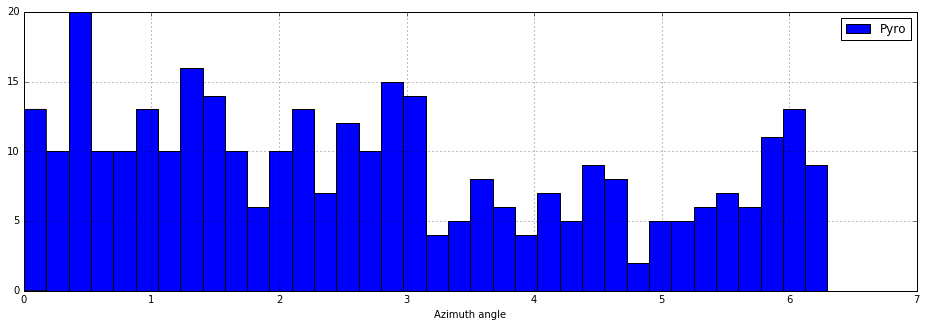

In [8]:
plt.figure(figsize=(16,5))
#plt.hist(datum['Phi']*180.0/3.14159, range=[0, 360], bins=36, alpha=1, label=r"Pyro")
plt.hist(datum['Phi'], range=[0, 6.3], bins=36, alpha=1, label=r"Pyro")
plt.xlabel('Azimuth angle')
plt.legend(loc=1)
plt.grid()

## Оси ливней

### Распределение осей в координатах x/H, y/H

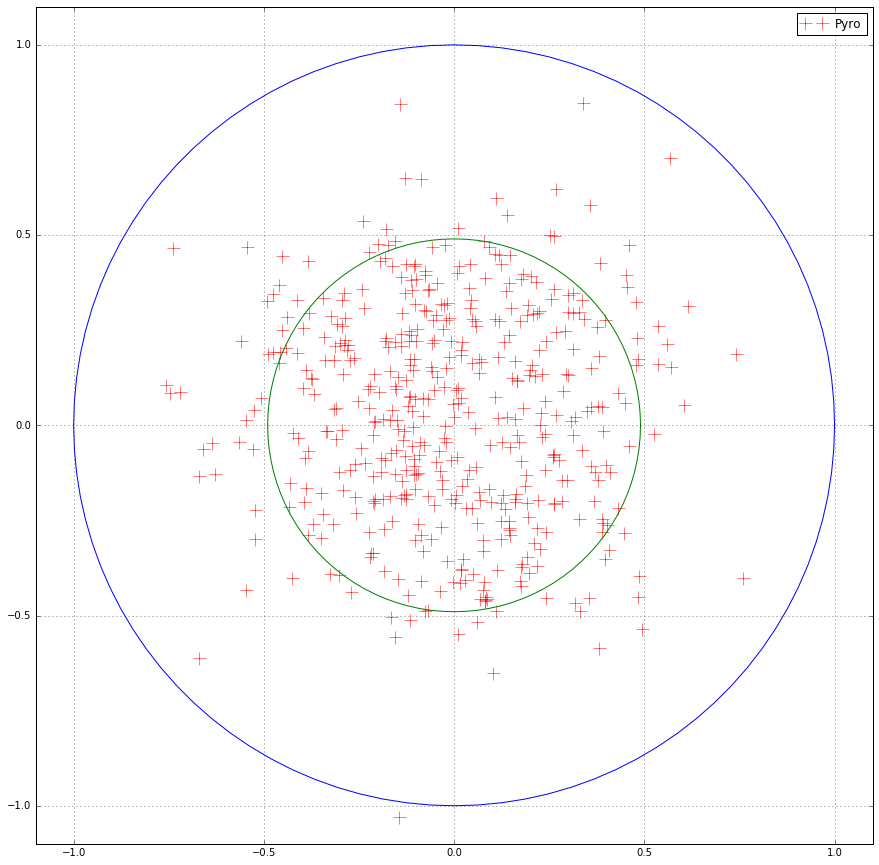

In [21]:
plt.figure(figsize=(15,15))
plt.plot(datum['Xo']/datum['H'], datum['Yo']/datum['H'], 'r+', markersize = 13, label="Pyro")
r = 1.1
plt.xlim([-r,r]); 
plt.ylim([-r,r])
plt.legend(loc=1)

# --- draw circle ---
x = []; y = []
for i in range(0,101):
    x.append(mt.cos(0.02*i*3.14159))    
    y.append(mt.sin(0.02*i*3.14159))
plt.plot(x,y)
# --- draw circle ---
x = []; y = []
for i in range(0,101):
    x.append(0.49*mt.cos(0.02*i*3.14159))    
    y.append(0.49*mt.sin(0.02*i*3.14159))
plt.plot(x,y)
plt.grid()

### Распределение по расстоянию оси до центра установки

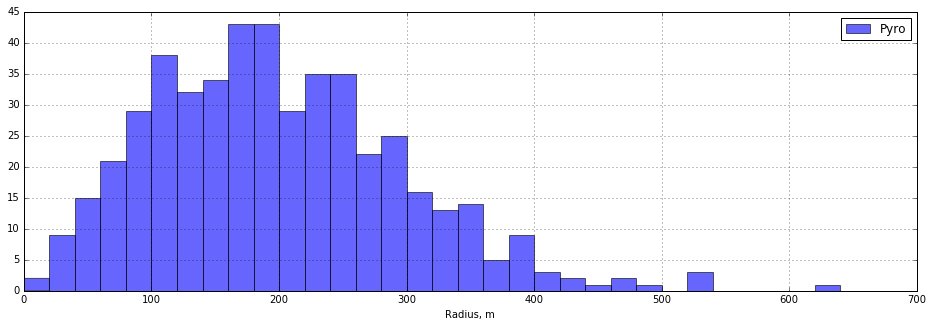

In [10]:
from math import sqrt
plt.figure(figsize=(16,5))
datum['r'] = datum['Xo']*datum['Xo'] + datum['Yo']*datum['Yo']
datum['r'] = np.sqrt(datum['r'])

plt.hist(datum['r'], range=[0, 700], bins=35, alpha=0.6, label=r"Pyro")
plt.xlabel('Radius, m')
plt.legend(loc=1)
plt.grid()

### Распределение по отношению расстояния к высоте

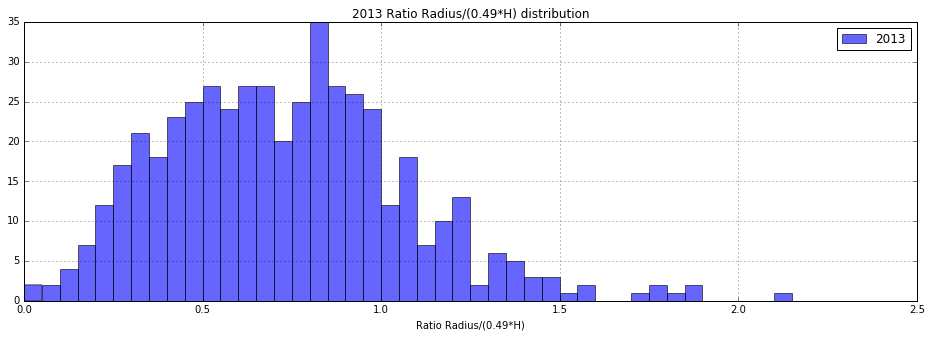

In [11]:
plt.figure(figsize=(16,5))
plt.hist(datum['r']/(0.49*datum['H']), range=[0, 2.2], bins=44, alpha=0.6, label=r"2013")
plt.title('2013 Ratio Radius/(0.49*H) distribution')
plt.xlabel('Ratio Radius/(0.49*H)')
plt.legend(loc=1)
plt.grid()
plt.savefig('2013_r_div_H.png', dpi=100)
plt.savefig('2013_r_div_H.eps')

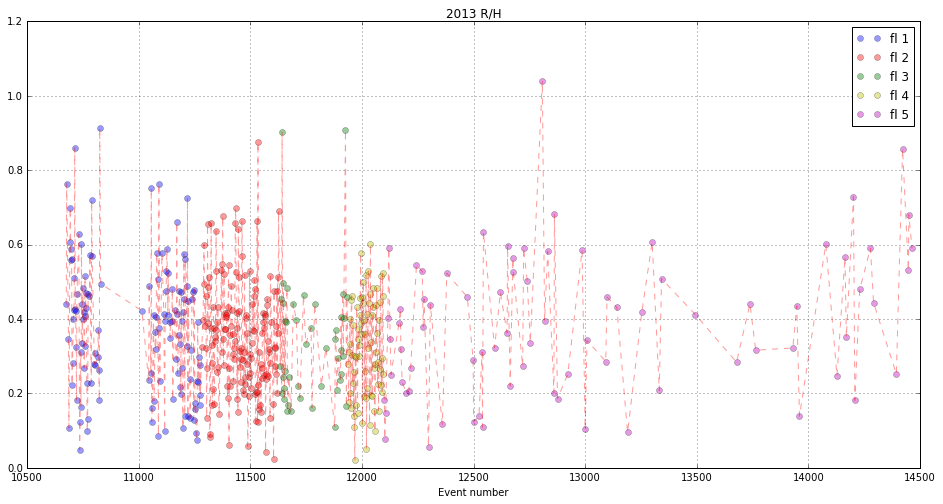

In [12]:
plt.figure(figsize=(16,8))
#plt.plot( datum['r']/datum['H'],'ro', alpha=0.4)
plt.plot( datum['r']/datum['H'][datum['Fl'] == 1 ],'bo', alpha=0.4, label = 'fl 1')
plt.plot( datum['r']/datum['H'][datum['Fl'] == 2 ],'ro', alpha=0.4, label = 'fl 2')
plt.plot( datum['r']/datum['H'][datum['Fl'] == 3 ],'go', alpha=0.4, label = 'fl 3')
plt.plot( datum['r']/datum['H'][datum['Fl'] == 4 ],'yo', alpha=0.4, label = 'fl 4')
plt.plot( datum['r']/datum['H'][datum['Fl'] == 5 ],'mo', alpha=0.4, label = 'fl 5')
plt.plot( datum['r']/datum['H'], 'r--',alpha=0.4)
plt.title('2013 R/H')
plt.xlabel('Event number')
plt.legend(loc='best')
plt.grid()
plt.savefig('2013_r_div_H_events.png', dpi=100)
plt.savefig('2013_r_div_H_events.eps')

#### Вывод: Все экспериментальные события 2013 года (кроме одного) лежат внутри круга радиуса H.

## Сумма сигналов

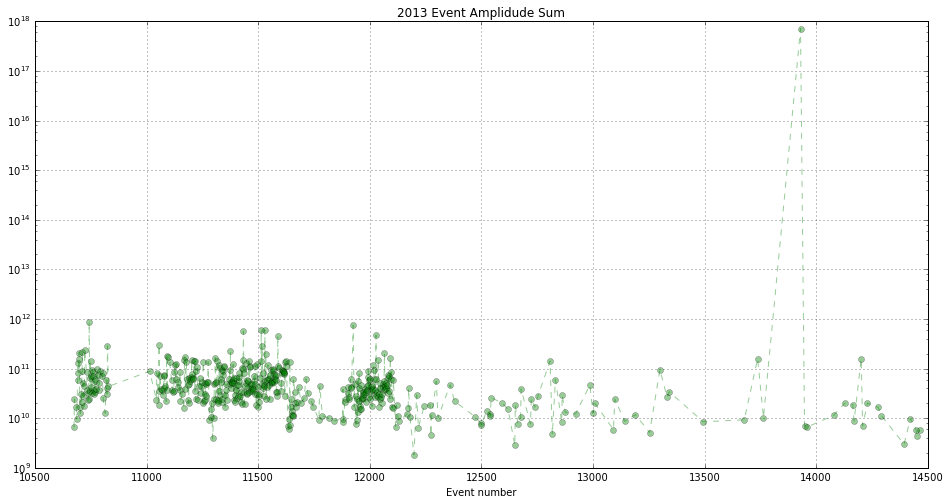

In [13]:
plt.figure(figsize = (16,8))
#plt.hist( datum['Integral'], bins=70, alpha=0.4)
plt.semilogy( datum['Integral'], 'g--', alpha=0.4)
plt.semilogy( datum['Integral'], 'go',  alpha=0.4)
plt.title('2013 Event Amplidude Sum')
plt.xlabel('Event number')
plt.grid()

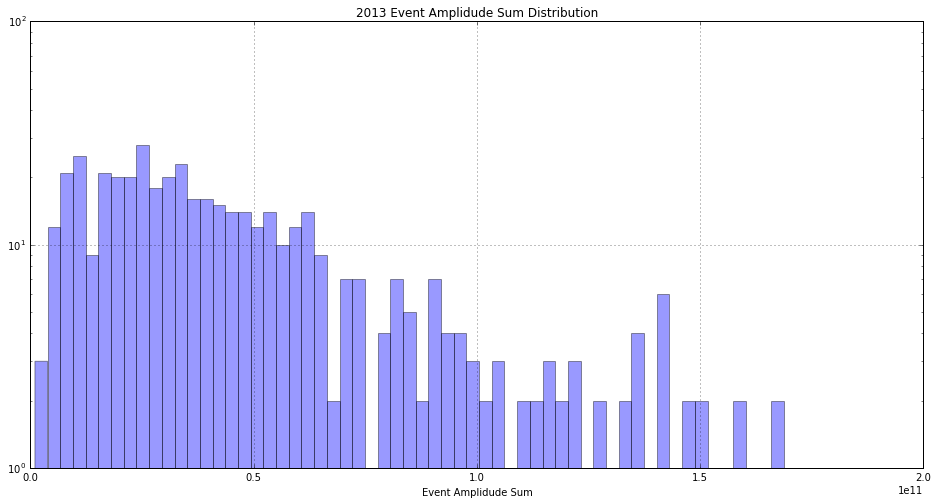

In [22]:
# -- пока не могу сделать логарифмический масштаб по оси х
plt.figure(figsize = (16,8))
plt.hist( datum['Integral'], range=[1e9, 0.2e12], bins=70, alpha=0.4)
plt.yscale('log')
plt.title('2013 Event Amplidude Sum Distribution')
plt.xlabel('Event Amplidude Sum')
plt.grid()

## Высота

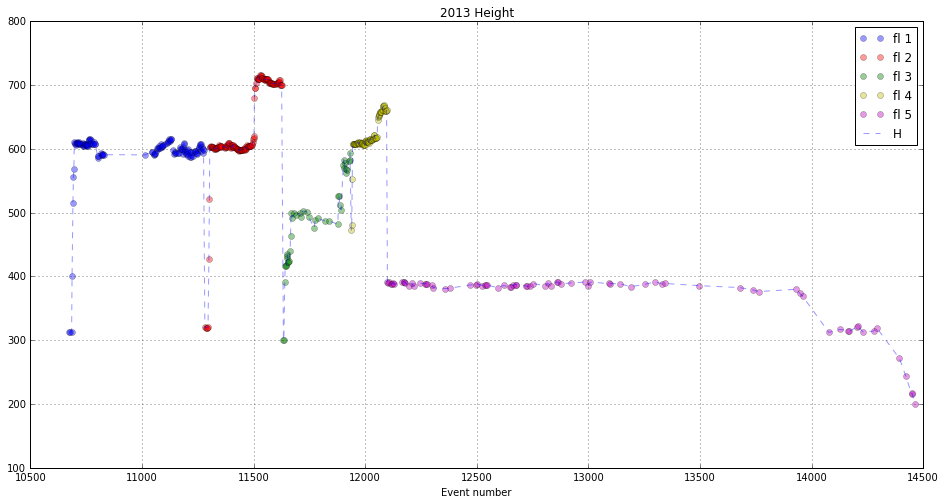

In [15]:
plt.figure(figsize=(16,8))
plt.plot( datum['H'][datum['Fl'] == 1 ],'bo', alpha=0.4, label = 'fl 1')
plt.plot( datum['H'][datum['Fl'] == 2 ],'ro', alpha=0.4, label = 'fl 2')
plt.plot( datum['H'][datum['Fl'] == 3 ],'go', alpha=0.4, label = 'fl 3')
plt.plot( datum['H'][datum['Fl'] == 4 ],'yo', alpha=0.4, label = 'fl 4')
plt.plot( datum['H'][datum['Fl'] == 5 ],'mo', alpha=0.4, label = 'fl 5')
plt.plot( datum['H'], 'b--', alpha=0.4)
plt.title('2013 Height')
plt.xlabel('Event number')
plt.legend(loc=1)
plt.grid()

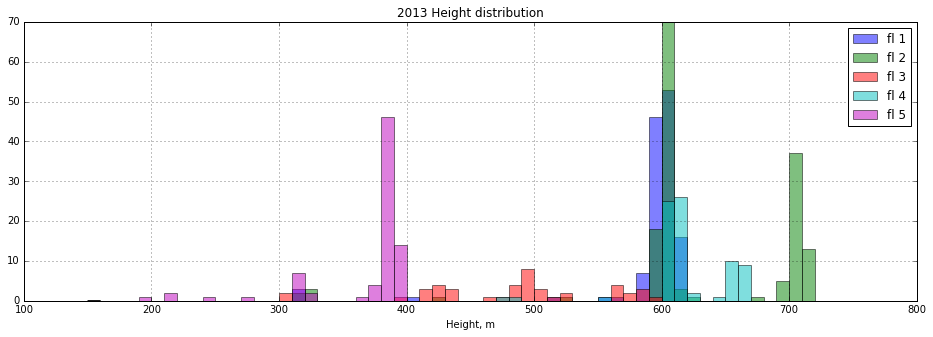

In [16]:
# Распределение событий по высотам
plt.figure(figsize=(16,5))
#plt.hist(datum['H'], range=[150, 750], bins=60, alpha=1, label=r"All")
plt.hist(datum['H'][datum['Fl'] == 1 ], range=[150, 750], bins=60, alpha=0.5, label=r"fl 1")
plt.hist(datum['H'][datum['Fl'] == 2 ], range=[150, 750], bins=60, alpha=0.5, label=r"fl 2")
plt.hist(datum['H'][datum['Fl'] == 3 ], range=[150, 750], bins=60, alpha=0.5, label=r"fl 3")
plt.hist(datum['H'][datum['Fl'] == 4 ], range=[150, 750], bins=60, alpha=0.5, label=r"fl 4")
plt.hist(datum['H'][datum['Fl'] == 5 ], range=[150, 750], bins=60, alpha=0.5, label=r"fl 5")
plt.xlabel('Height, m')
plt.title('2013 Height distribution')
plt.legend(loc=1)
plt.grid()

### Углы наклона установки

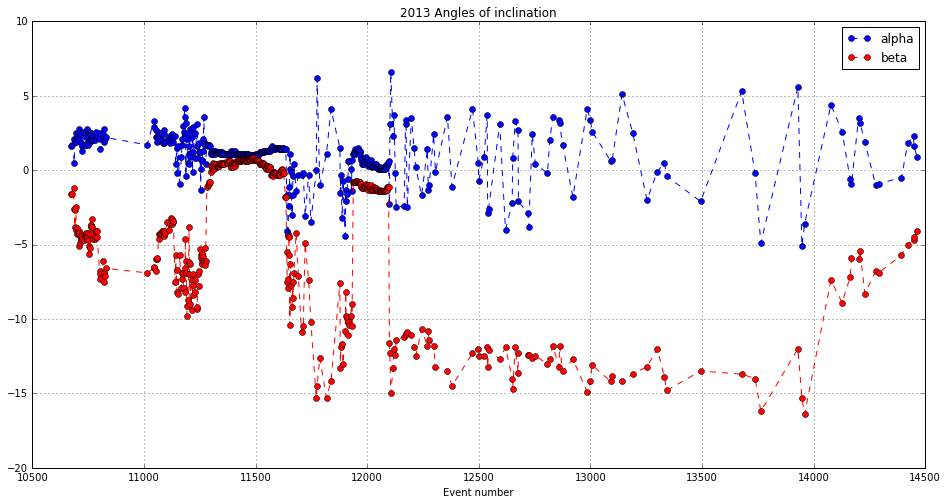

In [17]:
plt.figure(figsize=(16,8))
plt.plot( datum['alpha'], 'bo--', label='alpha')
plt.plot( datum['beta'],  'ro--', label='beta')
plt.legend(loc='best')
plt.title('2013 Angles of inclination')
plt.xlabel('Event number')
plt.grid()

In [18]:
datum[:]

,Year,Fl,Ver,H,alpha,beta,Theta,Phi,Xo,Yo,Integral,r
Number,,,,,,,,,,,,
10675,2013,1,12.0,312.7,1.6,-1.6,0.25623,5.35497,23.69,-135.26,6.520000e+09,137.318912
10677,2013,1,12.0,312.7,1.7,-1.6,0.43936,2.88205,-236.56,33.14,2.440000e+10,238.870034
10685,2013,1,12.0,313.0,2.1,-1.2,0.31515,-1.60465,67.90,-84.53,1.670000e+10,108.423848
10687,2013,1,12.0,400.7,0.5,-2.6,0.27187,3.09727,-19.08,-38.36,9.600000e+09,42.843156
10691,2013,1,12.0,515.4,1.9,-3.8,0.53109,2.00287,311.12,27.89,5.920000e+10,312.367582
10693,2013,1,12.0,555.7,2.0,-2.7,0.09823,5.97385,212.05,-325.89,1.270000e+11,388.805214
10695,2013,1,12.0,567.9,1.9,-2.5,0.36325,5.87940,-136.21,305.19,8.210000e+10,334.206673
10697,2013,1,12.0,611.6,2.5,-4.0,0.70867,0.39598,327.54,98.95,2.100000e+11,342.160129
10699,2013,1,12.0,609.8,2.2,-3.9,0.47702,0.69186,159.42,302.98,1.530000e+11,342.361821
